Godfrey Beddard 'Applying Maths in the Chemical & Biomolecular Sciences' Chapter 9

In [19]:
# import all python add-ons etc that will be needed later on
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from scipy.integrate import quad
init_printing()                         # allows printing of SymPy results in typeset maths format
plt.rcParams.update({'font.size': 14})  # set font size for plots

# Fourier series Answers 1-6

**Q1 answer** To confirm the integrations involved in calculating $b_n$, the method of section 1.4, eq. 12 can be used. Each term in the series is multiplied by $\sin(mx)$, and then integrated over the range $\pm\pi$. The series $g(x)$ is given by eqn 1 and approximates $f(x)$ as 

$$\displaystyle  f(x) \approx g(x) = \frac{a_0}{2}+ \sum\limits_{n=1}^\infty a_n\cos(nx) + \sum\limits_{n=1}^\infty b_n\sin(nx)   $$

Following eqn. 12, but multiplying by the sine the $m$<sup>th</sup> term gives,

$$\displaystyle \int\limits_{-\pi}^\pi f(x) \sin(mx)dx = \frac{a_0}{2}\int\limits_{-\pi}^\pi \sin(mx)dx +\int\limits_{-\pi}^\pi \left [\sum\limits_{n=1} a_n\cos(nx)+ \sum\limits_{n=1} b_n\sin(nx ) \right] \sin(mx)dx $$

The first integral with $a_0$ is zero, because sine is an odd function, the second integral is zero for the same reason. The last integral has to be treated carefully,however. Using Sympy for example produces answers depending on the values of $n$ and $m$,

In [20]:
n,m,x =symbols(' n m x')

f = sin(n*x)*sin(m*x)
I0=  integrate(f,x)
I0

⎧                       0                         for m = 0 ∧ n = 0
⎪                                                                  
⎪       2             2                                            
⎪  x⋅sin (n⋅x)   x⋅cos (n⋅x)   sin(n⋅x)⋅cos(n⋅x)                   
⎪- ─────────── - ─────────── + ─────────────────     for m = -n    
⎪       2             2               2⋅n                          
⎪                                                                  
⎪      2             2                                             
⎨ x⋅sin (n⋅x)   x⋅cos (n⋅x)   sin(n⋅x)⋅cos(n⋅x)                    
⎪ ─────────── + ─────────── - ─────────────────       for m = n    
⎪      2             2               2⋅n                           
⎪                                                                  
⎪    m⋅sin(n⋅x)⋅cos(m⋅x)   n⋅sin(m⋅x)⋅cos(n⋅x)                     
⎪  - ─────────────────── + ───────────────────        otherwise    
⎪           2    2                2    2        

The cases when  when $m$ and $n$ are zero or negative do not apply since these must be greater than zero so the first integral that interests us when $m = n$. The first two terms evaluate to $x/2$ hence,  

$$\displaystyle \left. \frac{x}{2} - \frac{1}{2n}\sin(nx)\cos(nx) \right|_{-\pi}^\pi = \pi $$

When $m \ne n$

$$\displaystyle  \left. \frac{1}{(m^2 - n^2)}(-m\sin(nx)\cos(mx) + n\sin(mx)\cos(nx)) \right|_{-\pi}^\pi = 0$$

and the summation is reduced to just this one term. The equation for the coefficients $b_n$ is

$$\displaystyle   b_n= \frac{1}{\pi}\int\limits_{-\pi}^{+\pi}f(x)\sin(nx)dx \qquad  (n \gt 0)  $$

**Q2 answer**   The sine function is odd therefore only $b$ terms are present and

$$\displaystyle b_n=\frac{1}{L}\int_{-L}^L \sin(x)\sin(n\pi x/L)dx $$

This is a standard integral; it can be performed by hand by converting to an exponential form. You should confirm the result that Sympy gives.

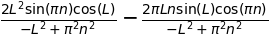

In [21]:
n, x, L=symbols(' n x L')
f = sin(x)*sin(n*pi*x/L)
I0=integrate(f,(x,-L,L),conds='none')
I0

As $n$ is an integer $\sin(n\pi)$ = 0 and $\cos(n\pi)$ = 1 thus the integral is

$$\displaystyle \int_{-L}^L \sin(x)\sin\left(\frac{n\pi x}{L}\right)dx =L\frac{2(-1)^{1+n}n\pi\sin(L)}{n^2\pi^2-L^2} $$

The Fourier series is therefore

$$\displaystyle \sin(x)\approx 2\pi\sin(L)\sum\limits_{n=1}\left(\frac{(-1)^{1+n}n}{n^2\pi^2-L^2}  \right) \sin\left(\frac{n\pi x}{L}\right) $$

which shows that because the sine is only defined over the range $-L \lt x \lt L$ and is zero elsewhere, there need to be many terms, $\gt$ 50, in the series to describe the function accurately as shown in the next figure.

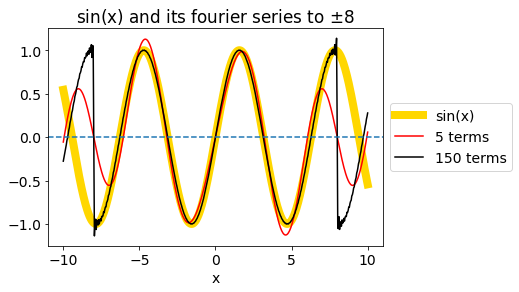

In [22]:
# plot fourier sine series   =  sum (bn sin(n.pi.x/L) n=1...)
fsin = lambda x, L ,k : 2*np.pi*np.sin(L)\
                        *sum( (-1)**(n+1)*n*np.sin(n*np.pi*x/L)/(np.pi**2*n**2 - L**2) for n in range (1,k))
L = 10.0
x= np.linspace(-L,L,500)

plt.plot(x,np.sin(x),color='gold',linewidth=8,label='sin(x)')
k=5
plt.plot(x, fsin(x, 8,k),color='red',label=str(k)+' terms' )
k=150
plt.plot(x, fsin(x, 8,k),color='black',label=str(k)+' terms' )

plt.axhline(0,linestyle='dashed')
plt.xlabel('x')
plt.title('sin(x) and its fourier series to '+r'$\pm 8$')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Figure 1. The sine wave (yellow line) and its Fourier series containing 5 (red) and 150 terms (black) over the range
$\pm$ 8. The latter  fits the sine wave well along its whole extent except near to $\pm L$ where it oscillates wildly. It is zero at $\pm L$ then repeats itself as may clearly be seen outside the range $\pm$ 8.

**Q3 answer** (a) Using equations (1) to (3) for $a$ and $b$ gives

$$\displaystyle a_n = \frac{1}{\pi}\int_{-\pi}^\pi (\frac{\pi}{2}-x)\cos(nx)dx $$

When $n$ = 0 the integral has the value $\displaystyle a_0 = \frac{1}{\pi}\int_{-\pi}^\pi (\frac{\pi}{2}-x)dx =\pi$

When $n \gt$ 0, the integral is zero, $a_n = 0;\;n \gt 0$ because the integral produces results proportional to the odd functions $\sin(x)$ and $x$  which are zero over the range $\pm \pi$. 

The $b$ coefficients are

$$\displaystyle b_n = \frac{1}{\pi}\int_{-\pi}^\pi (\frac{\pi}{2}-x)\sin(nx)dx  = -\frac{1}{\pi}\int_{-\pi}^\pi x\sin(nx)dx$$

This can be integrated 'by parts' ($\int udv = uv-\int vdu$)

$$\displaystyle b_n= -\frac{x}{n\pi}\left. \cos(nx)\right|_{-\pi}^\pi + \frac{1}{n\pi}\int_{-\pi}^\pi\cos(nx)dx = (-1)^n\frac{2}{n} $$

The second integral evaluates to zero even though the cosine is an even function and the limits symmetrical. This can be seen by sketching the cosine from $\pm\pi$.

The series is

$$\displaystyle \frac{\pi}{2}-x \approx \frac{\pi}{2} - 2\cos(x)+\cos(2x)-\frac{2}{3}\cos(3x)+\cdots$$

and a plot (Fig.2) to $n$ = 10 terms shows, how well it matches the function except close to $\pm\pi$ where this is poor. Notice that the function continues past $\pm\pi$ but the Fourier series repeats itself over this interval. You will notice that there is an overshoot and undershoot near to $\pm\pi$ rather as in the Gibbs phenomenon. In this case, however, because the line is sloping the size of the overshoot increases to a limit as the number of terms increases.

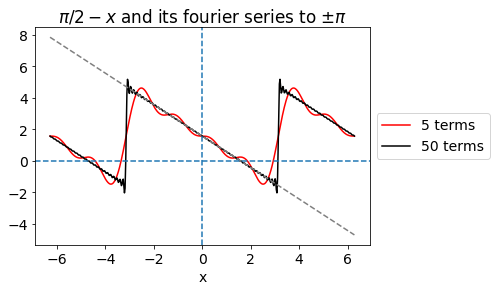

In [23]:
# plot fourier pi/2-x series  = a0/2 + sum( bn. sin(nx) n = 1...)
fx = lambda x, k : np.pi/2 + sum(  (2/n)*(-1)**n*np.sin(n*x) for n in range(1,k) )

x= np.linspace(-2*np.pi,2*np.pi,500)
k=5
plt.plot(x, fx(x, k),color='red',label=str(k)+' terms' )
k=50
plt.plot(x, fx(x, k),color='black',label=str(k)+' terms' )
plt.plot(x, np.pi/2-x ,color='gray',linestyle='dashed')

plt.axhline(0,linestyle='dashed')
plt.axvline(0,linestyle='dashed')
plt.xlabel('x')
plt.title(r'$\pi/2-x$ and its fourier series to '+r'$\pm \pi$')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Figure 2. Plot of $\pi$/2 - $x$ (dashed, straight line) and its Fourier series with  $n$ = 5 and 50, over the range $\pm \pi$. The series is zero at $x = \pm \pi$ and would repeat itself indefinitely if drawn to larger positive and negative $x$.

**Q4 answer**  (a) The result of the Hermite series summation using Algorithm in section 9.2 with appropriate changes, and with 20 terms in the series, is shown in the left-hand panel in Fig.3. This is a similar fit to the Fourier method for this particular function although it deviates at the extremities because the method assumes the function is periodic, which it is not. More terms in the summation improve the fit but numerical instability can become important due to the factorial and large powers involved.

(b) In the Chebychev polynomial calculation, the changing normalization $c$ can be handled by separating the first constant from the rest. Two different but equivalent forms of the polynomial are given in the code.

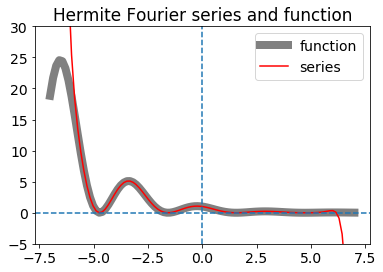

In [24]:
# using Hermite polynomials to form a fourier series.
def Hermite(n,x):       # use recursion formulae, H(n,x)=2xH(n-1,x) -2(n-1)H(n-2,x);  x position, n is order.
    if n == 0:
        return 1.0
    elif n == 1:
        return 2.0*x
    else:
        return 2.0*x*Hermite(n-1,x) - 2.0*(n-1)*Hermite(n-2,x)     # return H(n,x)
#--------------
def fact(n):           # factorial  by recursion
    if n == 0 or n == 1:
        return 1.0
    else:
        return n*fact(n-1)
#--------------  

f = lambda x: np.cos(x)**2*np.exp(-x/2.0)    # target function
w = lambda x: np.exp(-x**2)                  # weighting
c = lambda n: 2.0**n*fact(n)*np.sqrt(np.pi)  # normalisation

m = 20                                       # number of terms in series to sum
L = 7.0
numx = 100
x = np.linspace(-L,L,numx)

func= lambda x,n: f(x) * Hermite(n,x)*w(x) 

I0= [quad(func,-L,L,args = n )[0] for n in range(m)]     # separate out integral into list

FS = lambda x: sum( I0[n] * (Hermite(n,x)/c(n)) for n in range(0,m))    #  Fourier series eqn 20

plt.plot(x,f(x),color='gray',linewidth=8,label='function')  # originla function
plt.plot(x,FS(x),color='red',label='series')
plt.axhline(0,linestyle='dashed')
plt.axvline(0,linestyle='dashed')
plt.title('Hermite Fourier series and function')
plt.ylim([-5,30])
plt.legend()
plt.show()

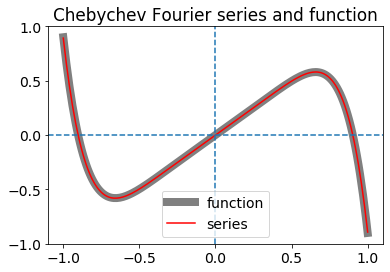

In [25]:
# using chebychev polynomials

def Achev(n,x):                 # as recursion  T(n,x)=  2xT(n-1,x) - T(n-2,x) 
    if n == 0:
        return 1
    elif n == 1:
        return x
    else:
        return  2*x*Achev(n-1,x) - Achev(n-2,x)

f = lambda x: x + x**3/10.0 - 2.0*x**7                       # target function
w = lambda x: 1.0/np.sqrt(1.0 - x**2)                        # weighting
c = lambda n: np.pi if n == 0 else np.pi/2.0 if n > 0 else 1 # normalisation

chev = lambda n,x : np.cos(n*np.arccos(x))   # alternative Chebychev polynomial

m = 10                                       # number of terms in series to sum
L = 1.0-1e-6                                 # avoid exactly 1;  weighting -> infinity

numx = 200
x = np.linspace(-L,L,numx)

func = lambda x,n: f(x) * chev(n,x) *w(x) 

I0= [quad(func,-L, L, args = n )[0] for n in range(m)]               # separate out integral into list

FS = lambda x: sum( I0[n] * (chev(n,x)/c(n)) for n in range(0,m))    #  Fourier series eqn 20

plt.plot(x,f(x),color='gray',linewidth=8,label='function')           # original function
plt.plot(x,FS(x),color='red',label='series')
plt.axhline(0,linestyle='dashed')
plt.axvline(0,linestyle='dashed')
plt.title('Chebychev Fourier series and function')
plt.ylim([-1,1])
plt.legend()
plt.show()

**Q5 answer** (a) The generating function result can be obtained as described in the text, and SymPy is definitely an advantage here. Note that the series is expanded in $u$ and terms in $x$ collected.

In [26]:
# generating function method for Laguerre polynomials
u, x, n =symbols('u, x n')

f01 = exp(  -x*u/(1 - u) )/(1 - u) 

s  = series(f01,u,n=10)
for n in range(1,6):
    print('L(',n,',x) ', s.coeff(u**n))  # extract coefficients with powers n.

L( 1 ,x)  1 - x
L( 2 ,x)  x**2/2 - 2*x + 1
L( 3 ,x)  -x**3/6 + 3*x**2/2 - 3*x + 1
L( 4 ,x)  x**4/24 - 2*x**3/3 + 3*x**2 - 4*x + 1
L( 5 ,x)  -x**5/120 + 5*x**4/24 - 5*x**3/3 + 5*x**2 - 5*x + 1


(b) Repeatedly differentiating gives the series directly.

In [27]:
x, n = symbols('x n')
f02 = exp(-x)*x**n
d = diff(f02,x)
for i in range(6):       # take result and differentiate again
    temp = diff(d,x)
    d = temp
    print('L(',i,',x) ', expand( exp(x)/factorial(n)*temp).subs({n:i} ))    # substitute i (a number ) for n   

L( 0 ,x)  1
L( 1 ,x)  3 - x
L( 2 ,x)  x**2/2 - 4*x + 6
L( 3 ,x)  -x**3/6 + 5*x**2/2 - 10*x + 10
L( 4 ,x)  x**4/24 - x**3 + 15*x**2/2 - 20*x + 15
L( 5 ,x)  -x**5/120 + 7*x**4/24 - 7*x**3/2 + 35*x**2/2 - 35*x + 21


In [28]:
x, n = symbols('x n')      # alternative method by using diff(f02,x,i) to differentiate i times
f02 = exp(-x)*x**n
for i in range(6):
    temp = diff(f02,x,i)         # get ith derivative
    drvt = temp.subs({n:i})      # replace n with value i 
    print('L(',i,',x) ', simplify(drvt*exp(x)/factorial(i)))     # multiply with exp(x)/factorial

L( 0 ,x)  1
L( 1 ,x)  1 - x
L( 2 ,x)  x**2/2 - 2*x + 1
L( 3 ,x)  -x**3/6 + 3*x**2/2 - 3*x + 1
L( 4 ,x)  x**4/24 - 2*x**3/3 + 3*x**2 - 4*x + 1
L( 5 ,x)  -x**5/120 + 5*x**4/24 - 5*x**3/3 + 5*x**2 - 5*x + 1


(c) Using the recursion formula.

In [29]:
def Lag(n,x):       # recursion formula, adjusted to return L(n,x)
    if n ==0:
        return 1
    elif n == 1:
        return 1-x
    else:
        return (  (2*n-1 -x)*Lag(n-1,x) -(n-1)*Lag(n-2,x)  )/n
    
for i in range(6):
    print('L(',i,',x)',simplify(Lag(i,x)))

L( 0 ,x) 1
L( 1 ,x) 1 - x
L( 2 ,x) (x - 3)*(x - 1)/2 - 1/2
L( 3 ,x) -x**3/6 + 3*x**2/2 - 3*x + 1
L( 4 ,x) x**4/24 - 2*x**3/3 + 3*x**2 - 4*x + 1
L( 5 ,x) -x**5/120 + 5*x**4/24 - 5*x**3/3 + 5*x**2 - 5*x + 1


**Q6 answer**  The value of $m$ has to be decided first,as this is not iterated, then values of $l$ calculated. Choosing $m$ = 0 with $l = 0$ gives $P_m^m = P_0^0 = 1$ and when $l = 1$ then $P_{m+1}^m = P_1^0 = xP_0^0 = x$. The recursion equation (22) can now be used to find $P_2^0$ with $l=2$, which is

$$2P_2^0=3xP_1^0 - P_0^0= 3x^1-1$$

giving $\displaystyle P_2^0=(3x^2-1)/2$. Substituting $P_2^0$, with $x = \cos(\theta)$ into eqn. (21) produces the spherical harmonic. The calculation using SymPy is shown next

In [30]:
# spherical harmonic calculation

x,n,m,L,phi=symbols('x n m L phi')

def Dblfact(n):           # double factorial  by recursion n(n-2)(n-4)....
    if n == 0 or n == 1:
        return 1.0
    else:
        return n*Dblfact(n-2)
#--------------  

def P(x,m,L):               # associated Legendre polynomials
    if m == 0 and L == 0 :
        return 1
    if m == L:
        return (-1)**m*Dblfact(2*m-1)*(1 - x**2)**(m/2)
    if m + 1 == L:
        return x*(2*m+1)*P(x,m,m)
     
    return (x*(2*L-1)*P(x,m,L-1 )  - (L+m-1)*P(x,m,L-2) )/(L-m)

#--------------   

print('   L   m      assoc legendre')
for L in [0,1,2,3] :
    for m in range(L+1):
        print('{:4d}{:4d}      {:s}'.format(L, m,str(simplify( expand(P(x,m,L))) ) ) )
print('\nsph harmonics\n   l   m') 
for L in [0,1,2,3] :
    for m in range(L+1):
        sph= sqrt( (2*L+1)*factorial(L-m)/(4*pi*factorial(L+m)) )*P(x,m,L)*exp(I*m*phi) 
        print('{:4d}{:4d}      {:s}'.format( L, m,  str(sph) ))
        if m !=0:
            sphc= (-1)**m*sqrt( (2*L+1)*factorial(L-m)/(4*pi*factorial(L+m)) )*P(x,m,L)*exp(-I*m*phi) 
            print('{:4d}{:4d}      {:s}'.format( L,-m,  str(simplify(expand(sphc) ))))
        pass
    pass

   L   m      assoc legendre
   0   0      1
   1   0      x
   1   1      -1.0*(1 - x**2)**0.5
   2   0      3*x**2/2 - 1/2
   2   1      -3.0*x*(1 - x**2)**0.5
   2   2      3.0*(1 - x**2)**1.0
   3   0      x*(5*x**2 - 3)/2
   3   1      (1 - x**2)**0.5*(1.5 - 7.5*x**2)
   3   2      15.0*x*(1 - x**2)**1.0
   3   3      -15.0*(1 - x**2)**1.5

sph harmonics
   l   m
   0   0      1/(2*sqrt(pi))
   1   0      sqrt(3)*x/(2*sqrt(pi))
   1   1      -0.25*sqrt(6)*(1 - x**2)**0.5*exp(I*phi)/sqrt(pi)
   1  -1      0.25*sqrt(6)*(1 - x**2)**0.5*exp(-I*phi)/sqrt(pi)
   2   0      sqrt(5)*(3*x**2/2 - 1/2)/(2*sqrt(pi))
   2   1      -0.25*sqrt(30)*x*(1 - x**2)**0.5*exp(I*phi)/sqrt(pi)
   2  -1      0.25*sqrt(30)*x*(1 - x**2)**0.5*exp(-I*phi)/sqrt(pi)
   2   2      0.125*sqrt(30)*(1 - x**2)**1.0*exp(2*I*phi)/sqrt(pi)
   2  -2      0.125*sqrt(30)*(1 - x**2)**1.0*exp(-2*I*phi)/sqrt(pi)
   3   0      sqrt(7)*(5*x*(3*x**2/2 - 1/2)/3 - 2*x/3)/(2*sqrt(pi))
   3   1      sqrt(21)*(-7.5*x**2*(1 - x**2)**

In [31]:
x,n = symbols(' x n ')     # alternative and simpler method by differentiating directly

def P(n,x):                # Legendre polynomial by recursion, see section 4
    if n == 0 : 
        return 1
    elif n == 1:
        return x
    else:
        return ((2*n-1)*x*P(n-1,x) -(n-1)*P(n-2,x))/n
#------------
print('   L   m       assoc legendre')      # Rodrigues formulae (-1)^m(sqrt(1-x^2)d^m/dx^m P(L,x))
for L in [0,1,2,3]:
    for m in range(L+1):
        f = diff(P(L,x), x, m)
        print('{:4d}{:4d}      {:s}'.format( L, m, str(simplify( (-1)**m*f*(1-x**2)**(m/2) )) ))

   L   m       assoc legendre
   0   0      1
   1   0      x
   1   1      -(1 - x**2)**0.5
   2   0      3*x**2/2 - 1/2
   2   1      -3*x*(1 - x**2)**0.5
   2   2      3*(1 - x**2)**1.0
   3   0      x*(5*x**2 - 3)/2
   3   1      3*(1 - 5*x**2)*(1 - x**2)**0.5/2
   3   2      15*x*(1 - x**2)**1.0
   3   3      -15*(1 - x**2)**1.5
